Bulirsch Stoer Integrator used to integrate 2nd order ODE to get position from acceleration:

In [21]:
def BS2O(function, planets, star, a, dt, n=4):
    # n = 4
    ms = star.m


    b = a + dt
    h = (b - a)/n

    f = function

    if len(planets) == 1:
        planet = planets[0]
        mp = planet.m
        px0, pvx0 = planet.x[-1], planet.vx[-1]
        py0, pvy0 = planet.y[-1], planet.vy[-1]
        jx0, jy0, jvx0, jvy0, mj = 0, 0, 0, 0, 0
    else:
        planet = planets[0]
        planet2 = planets[1]
        mp = planet.m
        mj = planet2.m
        px0, py0, pvx0, pvy0 = planet.x[-1], planet.y[-1], planet.vx[-1], planet.vy[-1]
        jx0, jy0, jvx0, jvy0 = planet2.x[-1], planet2.y[-1], planet2.vx[-1], planet2.vy[-1]


    sx0, svx0 = star.x[-1], star.vx[-1]
    sy0, svy0 = star.y[-1], star.vy[-1]


    a1 = f(px0, py0, mp, jx0, jy0, mj, sx0, sy0, ms)

    pvx1 = pvx0 + h*a1[0]
    pvy1 = pvy0 + h*a1[1]

    jvx1 = jvx0 + h*a1[2]
    jvy1 = jvy0 + h*a1[3]

    svx1 = svx0 + h*a1[4]
    svy1 = svy0 + h*a1[5]

    px1 = px0 + h*pvx1
    py1 = py0 + h*pvy1

    jx1 = jx0 + h*jvx1
    jy1 = jy0 + h*jvy1

    sx1 = sx0 + h*svx1
    sy1 = sy0 + h*svy1


    a2 = f(px1, py1, mp, jx1, jy1, mj, sx1, sy1, ms)

    pvx2 = pvx0 + 2*h*a2[0]
    pvy2 = pvy0 + 2*h*a2[1]

    jvx2 = jvx0 + 2*h*a2[2]
    jvy2 = jvy0 + 2*h*a2[3]

    svx2 = svx0 + 2*h*a2[4]
    svy2 = svy0 + 2*h*a2[5]

    px2 = px0 + 2*h*pvx2
    py2 = py0 + 2*h*pvy2
    jx2 = jx0 + 2*h*jvx2
    jy2 = jy0 + 2*h*jvy2
    sx2 = sx0 + 2*h*svx2
    sy2 = sy0 + 2*h*svy2


    a3 = f(px2, py2, mp, jx2, jy2, mj, sx2, sy2, ms)

    pvx3 = pvx1 + 2*h*a3[0]
    pvy3 = pvy1 + 2*h*a3[1]

    jvx3 = jvx1 + 2*h*a3[2]
    jvy3 = jvy1 + 2*h*a3[3]
    
    svx3 = svx1 + 2*h*a3[4]
    svy3 = svy1 + 2*h*a3[5]

    px3 = px1 + 2*h*pvx3
    py3 = py1 + 2*h*pvy3
    jx3 = jx1 + 2*h*jvx3
    jy3 = jy1 + 2*h*jvy3
    sx3 = sx1 + 2*h*svx3
    sy3 = sy1 + 2*h*svy3



    a4 = f(px3, py3, mp, jx3, jy3, mj, sx3, sy3, ms)

    pvx4 = pvx2 + 2*h*a4[0]
    pvy4 = pvy2 + 2*h*a4[1]

    jvx4 = jvx2 + 2*h*a4[2]
    jvy4 = jvy2 + 2*h*a4[3]

    svx4 = svx2 + 2*h*a4[4]
    svy4 = svy2 + 2*h*a4[5]

    px4 = px2 + 2*h*pvx4
    py4 = py2 + 2*h*pvy4
    jx4 = jx2 + 2*h*jvx4
    jy4 = jy2 + 2*h*jvy4
    sx4 = sx2 + 2*h*svx4
    sy4 = sy2 + 2*h*svy4



    a5 = f(px4, py4, mp, jx3, jy3, mj, sx4, sy4, ms)

    pvx5 = pvx3 + h*a5[0]
    pvy5 = pvy3 + h*a5[1]

    jvx5 = jvx3 + h*a5[2]
    jvy5 = jvy3 + h*a5[3]

    svx5 = svx3 + h*a5[4]
    svy5 = svy3 + h*a5[5]

    px5 = px3 + h*pvx5
    py5 = py3 + h*pvy5

    jx5 = jx3 + h*jvx5
    jy5 = jy3 + h*jvy5

    sx5 = sx3 + h*svx5
    sy5 = sy3 + h*svy5


    xp = 0.5*(px4 + px5)
    vxp = 0.5*(pvx4 + pvx5)

    yp = 0.5*(py4 + py5)
    vyp = 0.5*(pvy4 + pvy5)

    xj = 0.5*(jx4 + jx5)
    vxj = 0.5*(jvx4 + jvx5)

    yj = 0.5*(jy4 + jy5)
    vyj = 0.5*(jvy4 + jvy5)

    xs = 0.5*(sx4 + sx5)
    vxs = 0.5*(svx4 + svx5)

    ys = 0.5*(sy4 + sy5)
    vys = 0.5*(svy4 + svy5)

    return ((xp, yp, vxp, vyp), (xs, ys, vxs, vys), (xj, yj, vxj, vyj))

Import Necessary Libraries and create two classes: Planet and Star

In [22]:
import math
import numpy as np
G = 6.67 * (10 ** (-11))
# 6 * 10 ** 27

class Planet:
    def __init__(self, eccen, mass = 5.972e24) -> None:
        self.m = mass  # Earth mass
        self.x = []  # Initial x-coordinate
        self.y = []       # Initial y-coordinate
        self.vx = []      # Initial x-velocity
        self.vy = [] # [math.sqrt(G*self.m)]
        self.eccentricity = eccen
        self.calculate_initial_conditions()

    def update(self, info, k=0):
            self.x.append(info[k][0])
            self.y.append(info[k][1])
            self.vx.append(info[k][2])
            self.vy.append(info[k][3])

    def calculate_initial_conditions(self):

        if self.m == 5.972e24:
            r_peri = 1.5e11  # Perihelion distance
        else:
            r_peri = 7.48e11
        theta_peri = 0  # Angle at perihelion (radians)
        x0 = r_peri * (1 + self.eccentricity) * np.cos(theta_peri)
        y0 = r_peri * (1 + self.eccentricity) * np.sin(theta_peri)
        
        # Calculate initial velocity using specific orbital energy equation
        v0 = math.sqrt(G * (1 + self.eccentricity) *  1.989e30 / r_peri)
        vx0 = -v0 * np.sin(theta_peri)
        vy0 = v0 * np.cos(theta_peri)

        # Set initial conditions
        self.x.append(x0)
        self.y.append(y0)
        self.vx.append(vx0)
        self.vy.append(vy0)

    
  

class Star:
    def __init__(self, vi) -> None:
        self.m = 1.989e30
        self.x = [-10]
        self.y = [0]
        self.vx = [0]
        self.vy = [vi]

    def update(self, info):
        self.x.append(info[1][0])
        self.y.append(info[1][1])
        self.vx.append(info[1][2])
        self.vy.append(info[1][3])

Acceleration function, based on centripetal force. Returns components of acceleration for planets and the star in the system.

In [23]:
def acceleration(xp, yp, mp, xj, yj, mj, xs, ys, ms):

    scaling_factor = math.sqrt(G*mp)
    r = math.sqrt((xp - xs)**2 + (yp - ys)**2)
    ax_star = (- G * mp / r**3 * (xs - xp))#/scaling_factor
    ay_star = (- G * mp / r**3 * (ys - yp))#/scaling_factor


    ax_planet = - ax_star * (ms / mp)
    ay_planet = - ay_star * (ms / mp)

    if mj != 0:
        r = math.sqrt((xj - xs)**2 + (yj - ys)**2)
        ax_star_j = (- G * mj / r**3 * (xs - xj))#/scaling_factor
        ay_star_j = (- G * mj / r**3 * (ys - yj))#/scaling_factor

        ax_planet_j = - ax_star_j * (ms / mj)
        ay_planet_j = - ay_star_j * (ms / mj)

        ax_star += ax_star_j
        ay_star += ay_star_j

    else:
        ax_planet_j = 0
        ay_planet_j = 0


    # print(ax_star, ay_star, xs, ys)
    return (ax_planet, ay_planet, ax_planet_j, ay_planet_j, ax_star, ay_star)


Main function to create objects, run simulations, and create plots.

135000000000.0
31348.258856487282


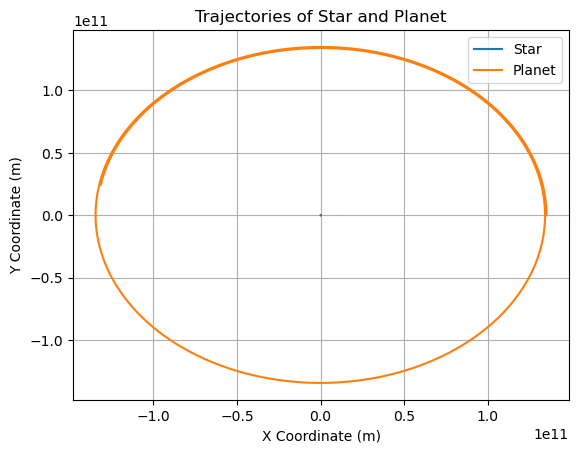

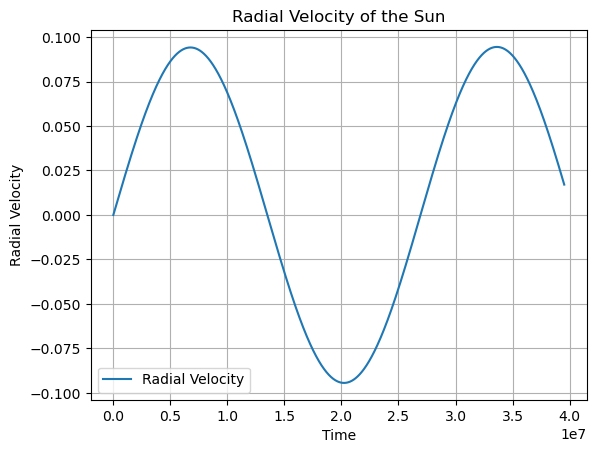

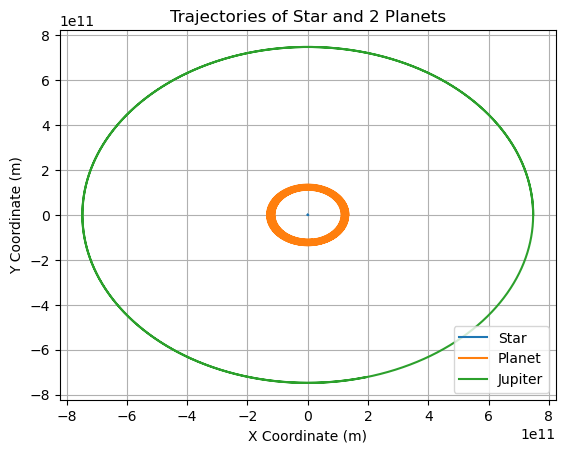

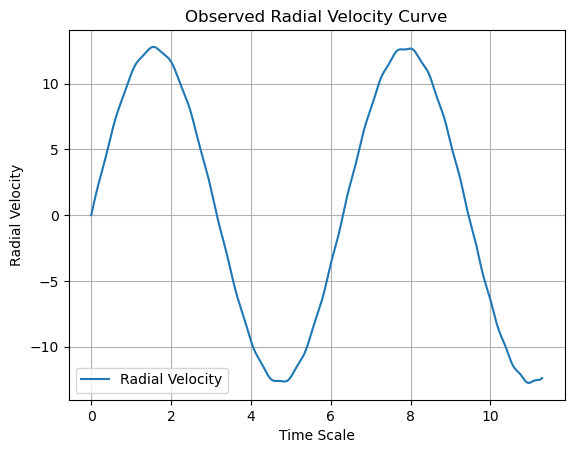

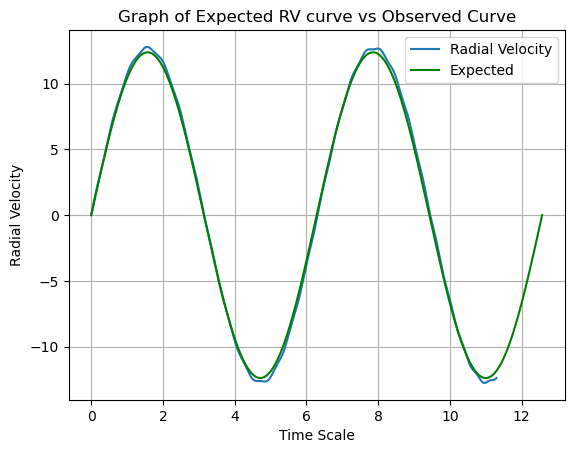

In [24]:
def main():
    sun = Star(-0.09)
    earth = Planet(0)
    print(math.sqrt(earth.x[0]**2 + earth.y[0]**2))
    print(math.sqrt(earth.vx[0]**2 + earth.vy[0]**2))

#     from bulirsch_stoer import BS2O
    t = 0
    dt = 10000

    while t < 366*24*60*60*1.25:
        tup = BS2O(acceleration, [earth], sun, t, dt)
        sun.update(tup)
        earth.update(tup)
        t += dt
    



    file = open('dataa', 'w')

    print(sun.vx, file=file)



    import matplotlib.pyplot as plt

    # Plot the trajectories
    plt.plot(sun.x, sun.y, label='Star')
    plt.plot(earth.x, earth.y, label='Planet')
    plt.xlabel('X Coordinate (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title('Trajectories of Star and Planet')
    plt.legend()
    plt.grid(True)
    plt.show()



    radialv = []
    for i in range(len(sun.vx)):
        radialv.append((i*dt, sun.vx[i]))

    t, v = zip(*radialv)

    # Plot the trajectories
    plt.plot(t, v, label='Radial Velocity')
    plt.xlabel('Time')
    plt.ylabel('Radial Velocity')
    plt.title('Radial Velocity of the Sun')
    plt.legend()
    plt.grid(True)
    plt.show()


    sun2 = Star(-12.5)
    earth2 = Planet(0)
    jupiter = Planet(0, 1.898e27)

    t = 0
    dt = 10000

    while t < 366*24*60*60*20:
        tup = BS2O(acceleration, [earth2, jupiter], sun2, t, dt)
        sun2.update(tup)
        earth2.update(tup)
        jupiter.update(tup, 2)
        t += dt
    

    # Plot the trajectories
    plt.plot(sun2.x, sun2.y, label='Star')
    plt.plot(earth2.x, earth2.y, label='Planet')
    plt.plot(jupiter.x, jupiter.y, label='Jupiter')

    plt.xlabel('X Coordinate (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.title('Trajectories of Star and 2 Planets')
    plt.legend()
    plt.grid(True)
    plt.show()

    radialv = []
    for i in range(len(sun2.vx)):
        radialv.append((i/5600, sun2.vx[i]))

    t, v = zip(*radialv)
    # print(v)

    plt.plot(t, v, label='Radial Velocity')
    plt.xlabel('Time Scale')
    plt.ylabel('Radial Velocity')
    plt.legend()
    plt.grid(True)
    plt.title('Observed Radial Velocity Curve')
    plt.show()


    periodj = 3.74e8
    periode = 365*24*60*60

    vrv1 = 2.95e-44* (earth2.m) /(sun2.m)**(-2/3) * (periode) ** (-1/3)
    vrv2 = 2.95e-44* (jupiter.m)/(sun2.m)**(-2/3) * (periodj) ** (-1/3)

    # vrv1 = 28.4* jupiter.m * (sun2.m)**(-2/3) * (periodj) ** (-1/3)
    # vrv2 = 28.4* earth2.m * (sun2.m)**(-2/3) * (periode) ** (-1/3)

    

    # Define constants and angles
    theta = np.linspace(0, 4*np.pi, 10000)  # Array of angles from 0 to 2*pi

    # Calculate function values
    y = vrv1 * np.sin(theta) + vrv2 * np.sin(theta)

    # Plot the graph
    plt.plot(t, v, label='Radial Velocity')
    plt.plot(theta, y, label = 'Expected', color='green')

    plt.xlabel('Time Scale')
    plt.ylabel('Radial Velocity')
    plt.legend()
    plt.grid(True)
    plt.title('Graph of Expected RV curve vs Observed Curve')
    plt.show()


    

main()

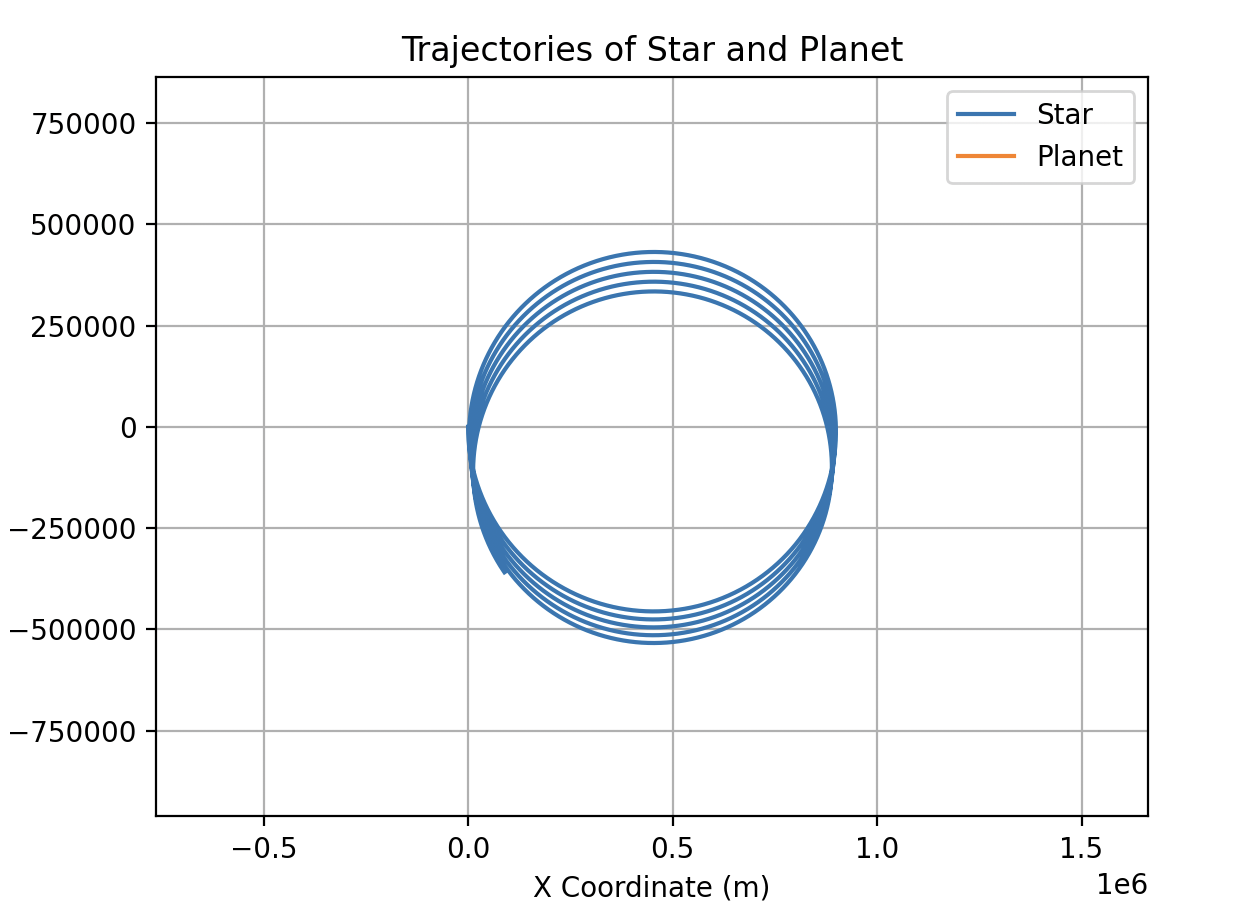

The above image is of the suns trajectory for the one planet system.